In [22]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

import sys
sys.path.append("..")
from settings import AMBIGUITY_PATH

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['font.size'] = 12
# plt.rcParams['figure.figsize'][0] *= 1.7
# plt.rcParams['figure.figsize'][1] *= 1.7

In [95]:
# nltk.download('brown')
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/jczestochowska/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

In [2]:
ambiguity = pd.read_csv(AMBIGUITY_PATH, encoding='utf-8')

In [6]:
words = ambiguity.word.values

In [124]:
ambiguity_tagged = []
for word in words:
    text = nltk.word_tokenize(word)
    ambiguity_tagged += nltk.pos_tag(text, tagset='universal')

In [ ]:
nltk_tags = list(zip(*ambiguity_tagged))[1]
nltk_tags_df = pd.Series(nltk_tags)

In [ ]:
brown_tags = list(zip(*nltk.corpus.brown.tagged_words(tagset='universal')))[1]
brown_tags_df = pd.Series(brown_tags)

/home/jczestochowska/.virtualenvs/base/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/jczestochowska/.virtualenvs/base/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


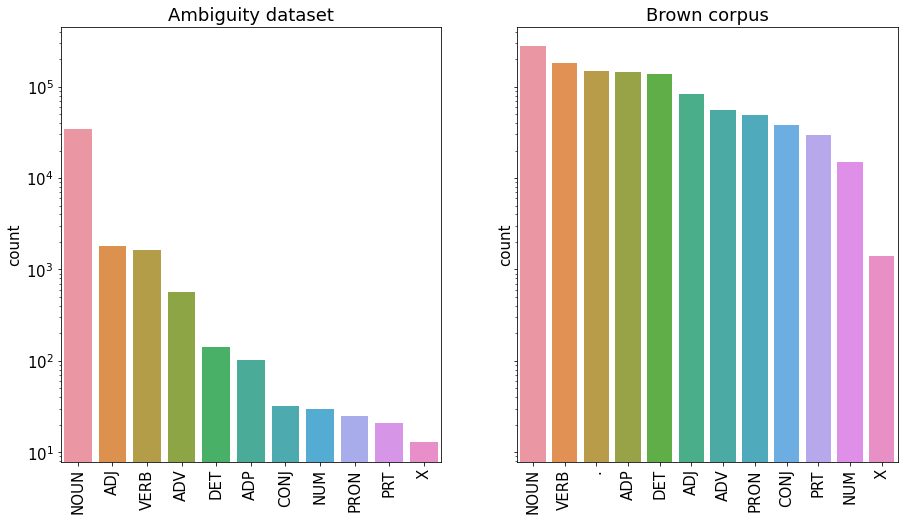

In [188]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [15, 8]
fig, axes = plt.subplots(1, 2, sharey=True)

g1 = sns.countplot(nltk_tags_df, order=nltk_tags_df.value_counts().index, ax=axes[0])
g1.set_yscale("log")
g1.set_xticklabels(g1.get_xticklabels(), rotation=90)
g1.set_title("Ambiguity dataset");

g2 = sns.countplot(brown_tags_df, order=brown_tags_df.value_counts().index, ax=axes[1])
g2.set_yscale("log")
g2.set_title("Brown corpus");
g2.set_xticklabels(g2.get_xticklabels(), rotation=90);

In [132]:
""""
VERB - verbs (all tenses and modes)
NOUN - nouns (common and proper)
PRON - pronouns
ADJ - adjectives
ADV - adverbs
ADP - adpositions (prepositions and postpositions)
CONJ - conjunctions
DET - determiners
NUM - cardinal numbers
PRT - particles or other function words
X - other: foreign words, typos, abbreviations
. - punctuation
"""

parts_of_speech = ["VERB", "NOUN", "PRON", "ADJ", "ADV", "ADP", "CONJ", "DET", "NUM", "PRT", "X", "."]

In [134]:
brown = nltk.corpus.brown.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(brown)

for pos in parts_of_speech:
    print(pos)
    print([wt[0] for (wt, _) in word_tag_fd.most_common(n=2000) if wt[1] == pos][:10])
    print()

VERB
['is', 'was', 'be', 'had', 'are', 'have', 'were', 'would', 'been', 'has']

NOUN
['time', 'man', 'Af', 'years', 'way', 'Mr.', 'people', 'men', 'world', 'life']

PRON
['it', 'he', 'I', 'He', 'they', 'you', 'him', 'who', 'It', 'we']

ADJ
['other', 'new', 'first', 'more', 'such', 'many', 'own', 'good', 'same', 'little']

ADV
['not', 'when', 'so', 'only', 'more', 'as', 'now', 'then', 'also', 'even']

ADP
['of', 'in', 'to', 'for', 'with', 'that', 'on', 'as', 'by', 'at']

CONJ
['and', 'or', 'but', 'But', 'And', 'either', '&', 'nor', 'Or', 'neither']

DET
['the', 'a', 'The', 'his', 'this', 'which', 'an', 'their', 'that', 'its']

NUM
['one', 'two', 'three', '1', '2', 'One', 'four', '3', 'five', '4']

PRT
['to', 'all', 'up', 'out', 'there', 'There', 'down', 'on', 'off', 'in']

X
[]

.
[',', '.', '``', "''", ';', '?', '--', ')', '(', ':']



In [138]:
ambiguity_word_tag_fd = nltk.FreqDist(ambiguity_tagged)

for pos in parts_of_speech:
    print(pos)
    print([wt[0] for (wt, _) in ambiguity_word_tag_fd.most_common(n=5000) if wt[1] == pos][:10])
    print()

VERB
['laughing', 'pen', 'crying', 'shocked', 'thinking', 'confused', 'rose', 'can', 'camping', 'lightning']

NOUN
['family', 'love', 'heart', 'moon', 'train', 'sad', 'square', 'star', 'book', 'flower']

PRON
['what', 'me', 'you', 'your', 'us']

ADJ
['happy', 'chinese', 'angry', 'surprised', 'japanese', 'black', 'green', 'worried', 'red', 'free']

ADV
['up', 'down', 'silly', 'forward', 'back', 'nose', 'upward', 'not', 'soon', 'close']

ADP
['on', 'off', 'tophat', 'around', 'of', 'like', 'above', 'in', 'below', 'at']

CONJ
['plus', 'and', 'or', 'less']

DET
['no', 'a', 'this', 'whatever', 'both', 'the', 'which', 'either', 'that', 'an']

NUM
['one', 'eight', 'two', 'five', 'left', 'four']

PRT
['to', 'out', 'up', 'off', 'back', 'down']

X
['de', 'lis', 'oh']

.
[]

